
## Problem Statement - 
Classify the description of E-commerce products into 4 categories by implementing any NLP approach for analysis and modeling on the provided dataset. The objective is to recognize whether the given description is related to Electronics (0), Households (1), Books (2), or Clothing & Accessories (3) products. 

Focus majorly on unique preprocessing techniques.


# Methodology Followed:

- Imported required liabrary for data pre processing Like pandas, numpy, seaborn, matplotlib
- Data loaded using pandas 
- Header added to dataset
- Data shape checked
- Missing Value checked using Heatmap 
- Text Mining is done using Natural Processing Langauge Liabrary
- Word Cloud plotted
- Label encoding done
- TFIDF applied
- Machine Learning Model applied
- Hyperparameter tuning done on best model

In [2]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing dataset excel file using pandas.
df=pd.read_csv("/content/drive/MyDrive/Ecommerce NLP/ecommerceDataset.csv",header = None) 

In [6]:
df.rename(columns={0: "class", 1:'Description'}, inplace=True)

In [7]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head(5)

No. of Rows : 50425
No. of Columns : 2


,class,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


## **Missing Value Check**

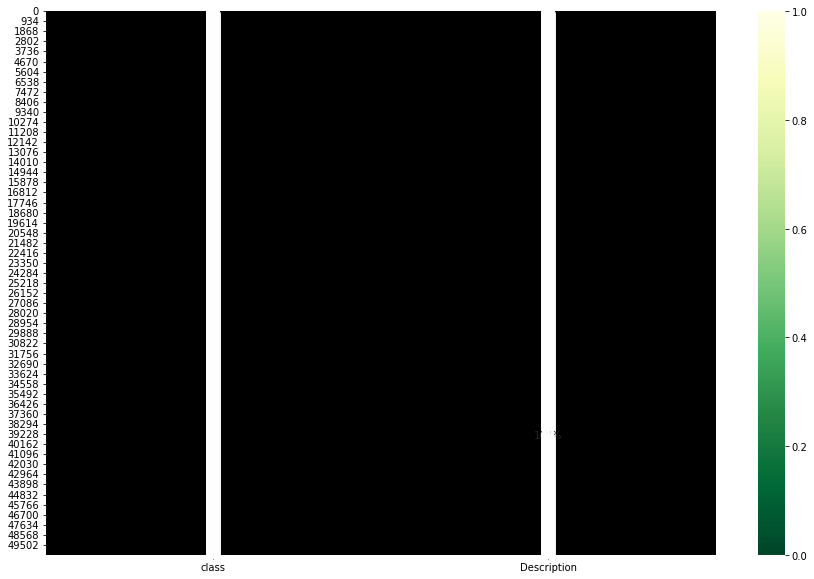

In [8]:
# Plotting heatmap for visualizing missing value
plt.figure(figsize=(15, 10))

sns.heatmap(df.isnull(), linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

In [9]:
df.isnull().sum()

class          0
Description    1
dtype: int64

 __There is one missing value in product description, We will drop it.__

In [10]:
df = df.dropna()

**No missing values are present**

### **Exploration of Target Variable Ratings**

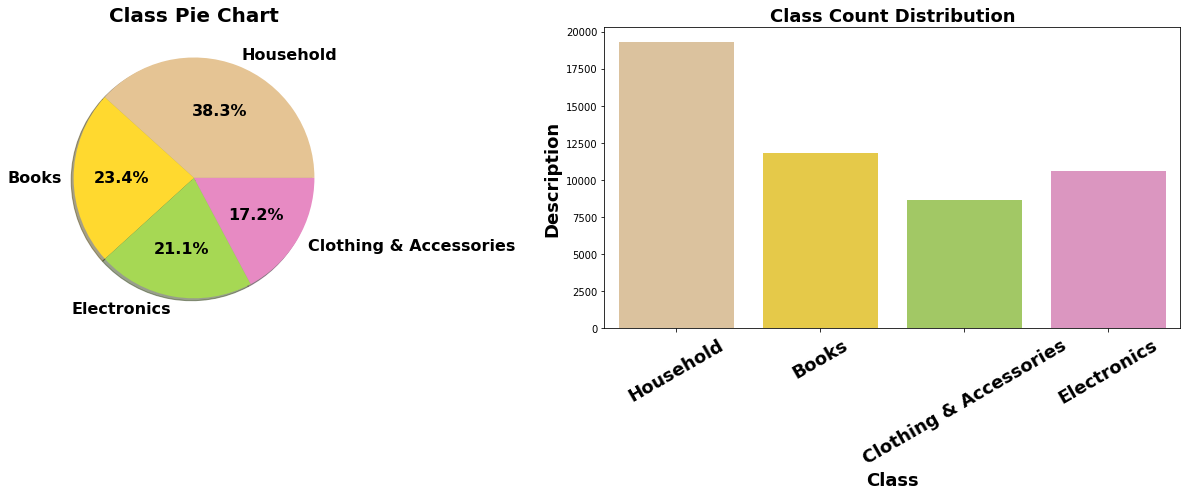

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: class, dtype: int64

Value Counts of Product Class:


In [11]:
###### Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(18,7))
df['class'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Class Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('class',data=df,ax=ax[1])
ax[1].set_title('Class Count Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Description",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold',rotation = 30)
plt.tight_layout()
plt.show()
print('Value Counts of Product Class:')
df['class'].value_counts()

## **Text Mining**

**Operation perform are as followed:**

- **Removing Punctuations and other special characters**

- **Word Tokenization**

- **Coverting text to lower case**

- **Text Preprocessing using regular expression**

- **Removing Stop Words**

- **Stemming and Lemmatising**

- **Applying Text Vectorization**

In [18]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [23]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- **Applying Regular expression for text extraction.**

In [28]:
def text_Preprocessing(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [29]:
#Calling the class
text_Preprocessing(df,'Description')
df['Description'].head(3)

0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood numbr inch x n...
2    saf uv textured modern art print framed painti...
Name: Description, dtype: object

- **Word Tokenization using RegexpTokenizer**

In [30]:
#Tokenization of data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Description'] = df['Description'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,class,Description
0,Household,"[paper, plane, design, framed, wall, hanging, ..."
1,Household,"[saf, floral, framed, painting, wood, numbr, i..."
2,Household,"[saf, uv, textured, modern, art, print, framed..."
3,Household,"[saf, flower, print, framed, painting, synthet..."
4,Household,"[incredible, gifts, india, wooden, happy, birt..."


- **Stemming & Lemmatization** 

In [31]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [34]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
import gensim
def lemmatization(i):
    return WordNetLemmatizer().lemmatize(i)

#Tokenize and Lemmatize
def preprocessing(i):
    result=[]
    for token in i:
        result.append(lemmatization(token))    
    return result

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [39]:
#Processing review with above Function
Text_description = []

for doc in df.Description:
    Text_description.append(preprocessing(doc))
    
print(len(Text_description))


50424


In [40]:
df['Description']= Text_description  #Assigning this to the dataframe

In [43]:
df['Text_Description'] = df['Description'].apply(lambda x:' '.join(y for y in x))
df.head()

,class,Description,Text_Description
0,Household,"[paper, plane, design, framed, wall, hanging, ...",paper plane design framed wall hanging motivat...
1,Household,"[saf, floral, framed, painting, wood, numbr, i...",saf floral framed painting wood numbr inch x n...
2,Household,"[saf, uv, textured, modern, art, print, framed...",saf uv textured modern art print framed painti...
3,Household,"[saf, flower, print, framed, painting, synthet...",saf flower print framed painting synthetic num...
4,Household,"[incredible, gift, india, wooden, happy, birth...",incredible gift india wooden happy birthday un...


#### **Word Cloud**
- **Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.**
- **The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.**
- **The enlarged texts are the most number of words used there and small texts are the less number of words used.**

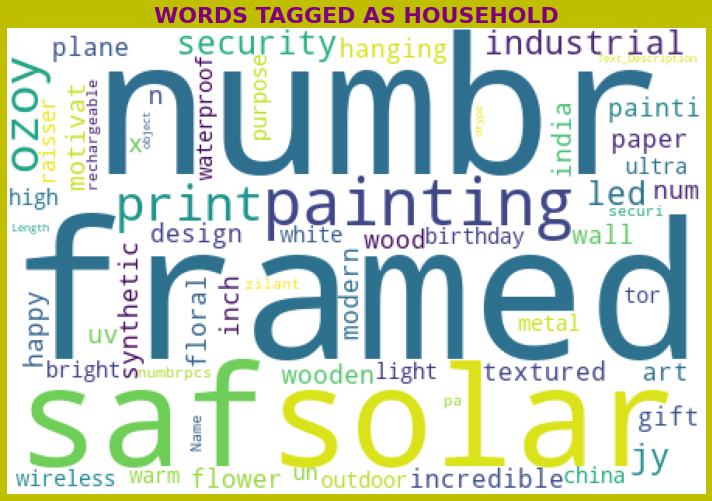

In [48]:
# Plotting for Household
df_household=df[(df['class']=='Household')]
wordcloud=WordCloud(height=300,width=450,max_words=250,background_color="white").generate(str(df_household['Text_Description']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HOUSEHOLD',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

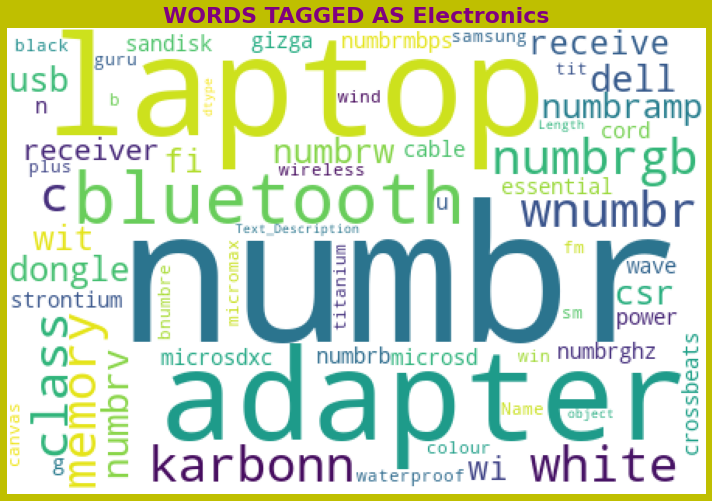

In [50]:
# Plotting for Electronics
df_elec=df[(df['class']=='Electronics')]
wordcloud=WordCloud(height=300,width=450,max_words=250,background_color="white").generate(str(df_elec['Text_Description']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS Electronics',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

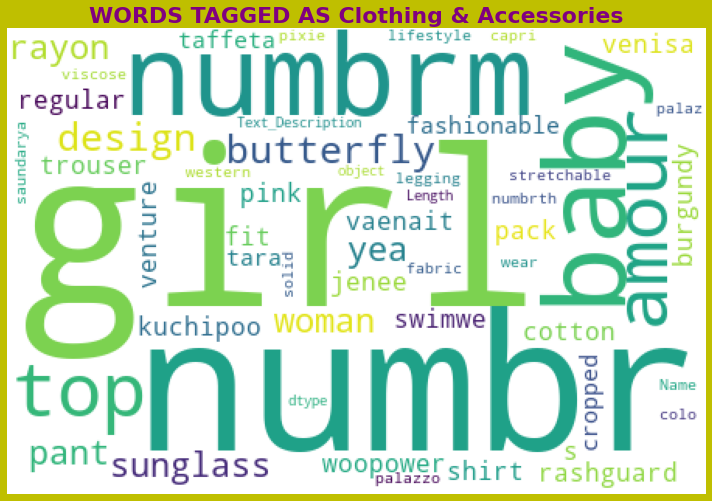

In [51]:
# Plotting for Clothing & Accessories
df_clothing=df[(df['class']=='Clothing & Accessories')]
wordcloud=WordCloud(height=300,width=450,max_words=250,background_color="white").generate(str(df_clothing['Text_Description']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS Clothing & Accessories',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

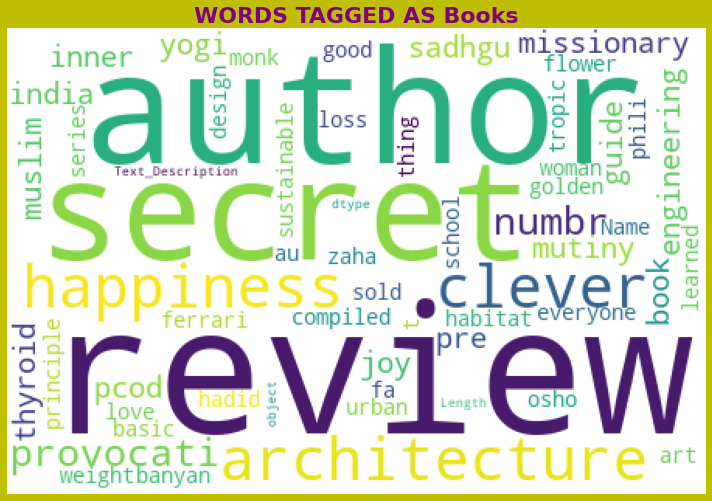

In [53]:
# Plotting for Books
df_book=df[(df['class']=='Books')]
wordcloud=WordCloud(height=300,width=450,max_words=250,background_color="white").generate(str(df_book['Text_Description']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS Books',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

In [72]:
# Converting text into numeric using TfidfVectorizer
Text_Vector = TfidfVectorizer(max_features=35000)
feature = Text_Vector.fit_transform(df['Text_Description'])
X=feature

In [73]:
X.shape

(50424, 35000)

In [74]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [75]:
df['class'] = Encoder.fit_transform(df['class'])

In [76]:
Y=df[['class']]

In [77]:
Y.shape

(50424, 1)

## **Machine Learning Model Building**

In [64]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (35296, 35000)
Training target vector size: (35296, 1)
Test feature matrix size: (15128, 35000)
Test target vector size: (15128, 1)


#### Finding best Random state

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    y_pred=LR.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9702538339502909 on Random_state 61


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=61, test_size=.3)
LR=LogisticRegression()
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9702538339502909


Confusion matrix of Logistics Regression : 
 [[3384   14   27   73]
 [  11 2520   11   27]
 [  52   11 3058  109]
 [  36   24   55 5716]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3498
           1       0.98      0.98      0.98      2569
           2       0.97      0.95      0.96      3230
           3       0.96      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [81]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(LR, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', LR, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.92920178 0.92583044 0.92285573 0.92047595 0.9212614 ]
Mean CV Score : 0.9239250621993893
Std deviation : 0.003212761082076771


### **Decision Tree Classifier**

In [82]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9552485457429931


Confusion matrix of Decision Tree Classifier : 
 [[3362   15   26   95]
 [  15 2471   17   66]
 [  40   15 3026  149]
 [  70   44  125 5592]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3498
           1       0.97      0.96      0.97      2569
           2       0.95      0.94      0.94      3230
           3       0.95      0.96      0.95      5831

    accuracy                           0.96     15128
   macro avg       0.96      0.95      0.96     15128
weighted avg       0.96      0.96      0.96     15128



In [83]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5, scoring='f1_macro')
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.81852004 0.8809804  0.87928573 0.86125899 0.86035658]
Mean CV Score : 0.8600803470254611
Std deviation : 0.02251392512896254


### **Random Forest Classifier**

In [84]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.971641988365944


Confusion matrix of Random Forest Classifier : 
 [[3404    8   16   70]
 [   9 2512    6   42]
 [  25    8 3045  152]
 [  39   16   38 5738]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3498
           1       0.99      0.98      0.98      2569
           2       0.98      0.94      0.96      3230
           3       0.96      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.98      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [85]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rf, X, Y, cv =5, scoring='f1_macro')
print('\033[1m'+'Cross Validation Score', rf, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.91763279 0.92294281 0.92671477 0.89809325 0.92928971]
Mean CV Score : 0.9189346669549205
Std deviation : 0.011134463787293178


In [87]:
ml=MultinomialNB()
ml.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('\033[1m'+'MultinominalMB'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of MultinominalMB:'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of MultinominalMB:'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of MultinominalMB'+'\033[0m \n',classification_report(Y_test, y_pred))

MultinominalMB


Accuracy Score of MultinominalMB: 0.971641988365944


Confusion matrix of MultinominalMB: 
 [[3404    8   16   70]
 [   9 2512    6   42]
 [  25    8 3045  152]
 [  39   16   38 5738]]


classification Report of MultinominalMB 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3498
           1       0.99      0.98      0.98      2569
           2       0.98      0.94      0.96      3230
           3       0.96      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.98      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [88]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ml, X, Y, cv =5, scoring='f1_macro')
print('\033[1m'+'Cross Validation Score', ml, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score MultinomialNB() :

CVScore : [0.9374104  0.93271751 0.92503001 0.91557861 0.93327217]
Mean CV Score : 0.9288017396748096
Std deviation : 0.007726632552482975


In [93]:
from xgboost import XGBClassifier
Xgb=XGBClassifier()
Xgb.fit(X_train,Y_train)
y_pred=Xgb.predict(X_test)
print('\033[1m'+'XGBoost Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of XGBoost Classifier:'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of XGBoost Classifier:'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of XGBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

XGBoost Classifier


Accuracy Score of XGBoost Classifier: 0.9001850872554205


Confusion matrix of XGBoost Classifier: 
 [[3136   38   23  301]
 [  36 2394   10  129]
 [ 116   24 2589  501]
 [ 141   98   93 5499]]


classification Report of XGBoost Classifier 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      3498
           1       0.94      0.93      0.93      2569
           2       0.95      0.80      0.87      3230
           3       0.86      0.94      0.90      5831

    accuracy                           0.90     15128
   macro avg       0.92      0.89      0.90     15128
weighted avg       0.90      0.90      0.90     15128



## **Hyper Parameter Tuning : GridSearchCV**

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
fmod_param = {'criterion' : ['gini','entropy']}

In [100]:
GCV = GridSearchCV(RandomForestClassifier(),fmod_param,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....................criterion=gini;, score=0.967 total time= 1.1min
[CV 2/5] END ....................criterion=gini;, score=0.963 total time= 1.0min
[CV 3/5] END ....................criterion=gini;, score=0.970 total time= 1.0min
[CV 4/5] END ....................criterion=gini;, score=0.960 total time= 1.1min
[CV 5/5] END ....................criterion=gini;, score=0.963 total time= 1.0min
[CV 1/5] END .................criterion=entropy;, score=0.967 total time= 1.2min
[CV 2/5] END .................criterion=entropy;, score=0.963 total time= 1.2min
[CV 3/5] END .................criterion=entropy;, score=0.968 total time= 1.1min
[CV 4/5] END .................criterion=entropy;, score=0.960 total time= 1.1min
[CV 5/5] END .................criterion=entropy;, score=0.961 total time= 1.1min


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=5)

In [101]:
rf=RandomForestClassifier(criterion="gini")

rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(Y_test,Y_pred))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(Y_test, Y_pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(Y_test, Y_pred)}")




***********************Testing Scores******************************

Accuracy score for testing is :  0.9707165520888419

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3498
           1       0.99      0.98      0.98      2569
           2       0.98      0.94      0.96      3230
           3       0.96      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128


CONFUSION MATRIX: 
 [[3393   12   16   77]
 [  12 2509    6   42]
 [  25   11 3045  149]
 [  40   14   39 5738]]


# Saving Model

In [103]:
import joblib
joblib.dump(rf,"Ecommerce_product_classification.pkl")

['Ecommerce_product_classification.pkl']